In [ ]:
%pip install tensorflow

In [ ]:
%pip install matplotlib

In [1]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [22]:
# grader-required-cell

source_path_wedding = 'train_dataset\wedding'

# source_path_dogs = os.path.join(source_path, 'Dog')
source_path_birthday = 'train_dataset\k_birth'

source_path_konser = 'train_dataset\konser'
# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_wedding))} images of wedding.")
print(f"There are {len(os.listdir(source_path_birthday))} images of birthday.")
print(f"There are {len(os.listdir(source_path_konser))} images of konser.")



There are 271 images of wedding.
There are 183 images of birthday.
There are 49 images of konser.


In [24]:
TRAINING_DIR = "train_dataset/"
training_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)
num_train_data = train_generator.samples
print("Jumlah dataset pelatihan:", num_train_data)
val_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
num_val_data = val_generator.samples
print("Jumlah dataset validasi:", num_val_data)


Found 404 images belonging to 3 classes.


Jumlah dataset pelatihan: 404
Found 99 images belonging to 3 classes.
Jumlah dataset validasi: 99


In [ ]:
%pip install Pillow

In [4]:
from PIL import Image
from keras.preprocessing.image import load_img
import os
from keras.preprocessing.image import ImageDataGenerator


In [25]:
model=tf.keras.models.Sequential([
# YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [35]:
class MyCustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs['accuracy'] >0.83 and logs['val_accuracy'] >0.70:
                print("Validation accuracy and accuracy is up to 0.83. Stopping training.")
                self.model.stop_training = True

custom_callback = MyCustomCallback()




In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
%pip install scipy


In [7]:
import scipy

In [37]:
history = model.fit(
        train_generator,
        epochs=10,
        # verbose=1,
        validation_data=val_generator,
        callbacks=[custom_callback]
    )

Epoch 1/10
7/7 [==============================] - 6s 868ms/step - loss: 0.0291 - accuracy: 0.9926 - val_loss: 2.4191 - val_accuracy: 0.6364
Epoch 2/10
7/7 [==============================] - 6s 905ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 2.3304 - val_accuracy: 0.6566
Epoch 3/10
7/7 [==============================] - 7s 927ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 2.2841 - val_accuracy: 0.6465
Epoch 4/10
7/7 [==============================] - 10s 1s/step - loss: 0.0157 - accuracy: 0.9975 - val_loss: 2.4547 - val_accuracy: 0.6061
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.0364 - accuracy: 0.9926 - val_loss: 2.1547 - val_accuracy: 0.6263
Epoch 6/10
7/7 [==============================] - 11s 1s/step - loss: 0.0919 - accuracy: 0.9604 - val_loss: 1.7675 - val_accuracy: 0.6162
Epoch 7/10
7/7 [==============================] - 11s 1s/step - loss: 0.1134 - accuracy: 0.9505 - val_loss: 2.3476 - val_accuracy: 0.6364
Epoch 8/10
7/7 [============

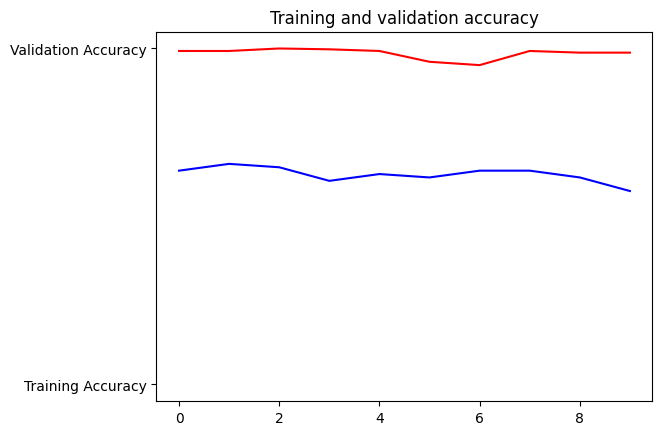

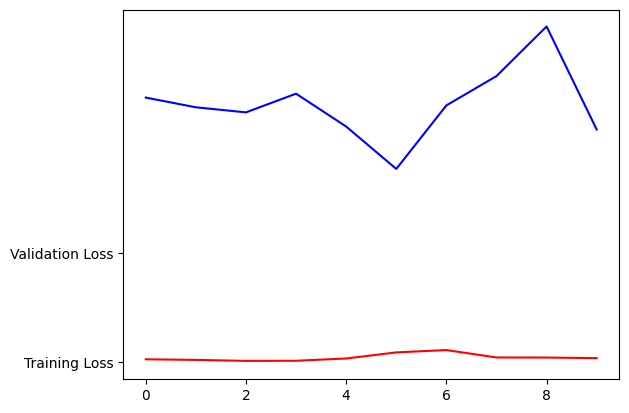

In [38]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [39]:
val_generator.class_indices

{'k_birth': 0, 'konser': 1, 'wedding': 2}

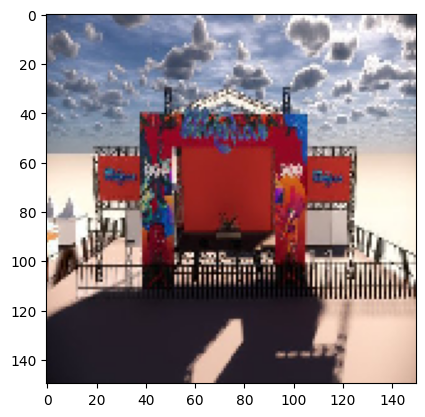

1/1 [==============================] - 0s 38ms/step
konser


In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np

# Load and preprocess the image
img_path = 'test_dataset\konser 2.jpg'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# img_array = preprocess_input(img_array)
img_array = np.vstack([img_array])
# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
# decoded_predictions = decode_predictions(predictions, top=3)[0]
# print("Predictions:")
# for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
#     print(f"{i + 1}: {label} ({score:.2f})")

# # Optionally, you can use the top predicted class for further processing
# top_prediction = decoded_predictions[0]
# top_class = top_prediction[1]
# confidence = top_prediction[2]

# Now, you can use 'top_class' and 'confidence' for further processing or decision making.

if np.any(predictions) ==0 :
    print ("k_birth")
elif np.any(predictions)== 1:
    print ("konser")
else:
    print ("wedding")



# {'Ant': 0, 'Cat': 1, 'Dog': 2}